In [7]:
# Scraping Flipkart Website - Using BeautifulSoup
# Dmitrii NEDOSEK

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
base = dict()
systems = []    # List for operating systems
quant = []      # List for number of operating systems
page = 1        # Page number

In [10]:
# Search for data on all pages of the site
while True:
    soup = requests.post(f"https://www.flipkart.com/laptops/pr?sid=6bo,b5g&marketplace=FLIPKART&page={page}")
    soup = BeautifulSoup(soup.content, 'html.parser')
    soup2 = soup.find('div', attrs={'class': '_3pLy-c row'})
    if soup2 == None: break
    for each in soup.find_all('a', href=True, attrs={'class':'_1fQZEK'}):
        result = each.find('div', attrs={'class':'fMghEO'})
        ul_element = result.find('ul')
        li_elements = ul_element.find_all('li')

        # Reading the text of each <li> element
        for li in li_elements:
            if "Operating System" in li.text:
                systems.append(li.text.replace("Operating System", ""))
    page += 1

In [11]:
# Structuring and storing data
df = pd.DataFrame({'System': systems}) 

# Output the DataFrame to CSV file
df.to_csv('products.csv', index = False)

# Data Visualization
df2 = pd.read_csv("products.csv")

# Counting the number of systems
for i in range(len(df2)):
    if df2["System"][i] in base.keys():
        base[df2["System"][i]] += 1
    else:
        base[df2["System"][i]] = 1

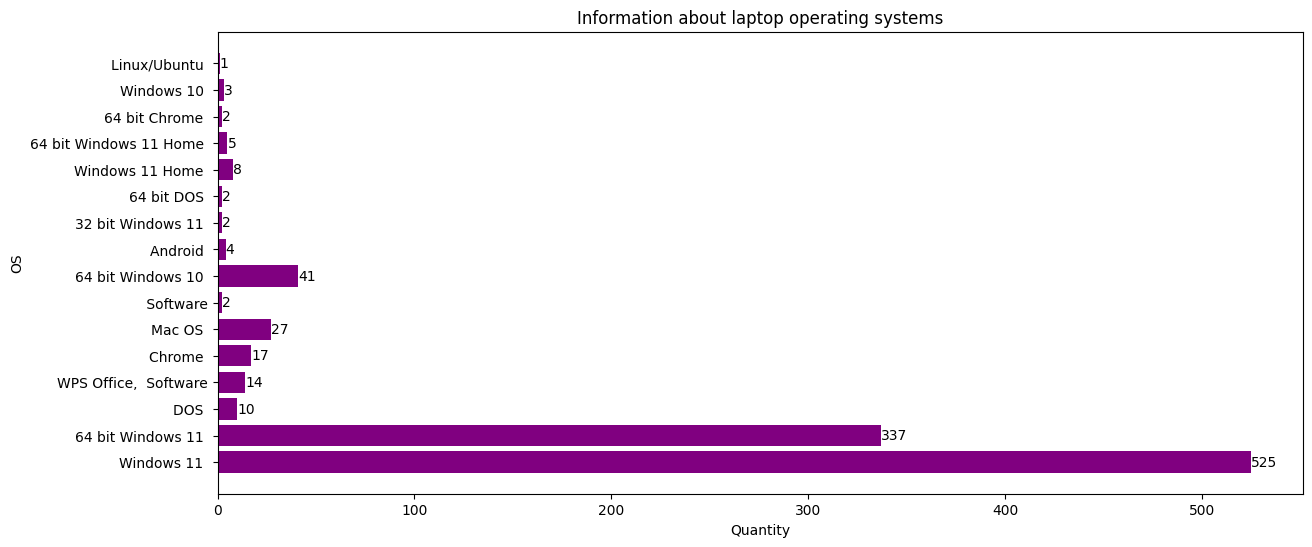

In [12]:
# Create a dataframe with calculated data
dat = pd.DataFrame({'System': base.keys(), 'Quantity': base.values()})

# Displaying the graph on the screen
plt.figure(figsize=(14, 6))
plt.barh(dat.System, dat.Quantity, color = 'purple', align = 'center', tick_label = dat.System)

for index, value in enumerate(dat.Quantity):
    plt.text(value, index, str(value), ha="left", va='center')

plt.xlabel("Quantity")
plt.ylabel("OS")
plt.title("Information about laptop operating systems")
plt.show()